Github: https://github.com/heberjuunior/Heber_ML_CA1_Y4

# Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

# Data Understanding

In [24]:
df = pd.read_csv('log2.csv')
df.head(20)

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action
0,57222,53,54587,53,177,94,83,2,30,1,1,allow
1,56258,3389,56258,3389,4768,1600,3168,19,17,10,9,allow
2,6881,50321,43265,50321,238,118,120,2,1199,1,1,allow
3,50553,3389,50553,3389,3327,1438,1889,15,17,8,7,allow
4,50002,443,45848,443,25358,6778,18580,31,16,13,18,allow
5,51465,443,39975,443,3961,1595,2366,21,16,12,9,allow
6,60513,47094,45469,47094,320,140,180,6,7,3,3,allow
7,50049,443,21285,443,7912,3269,4643,23,96,12,11,allow
8,52244,58774,2211,58774,70,70,0,1,5,1,0,allow
9,50627,443,16215,443,8256,1674,6582,31,75,15,16,allow


In [4]:
df.isnull().sum()

Source Port             0
Destination Port        0
NAT Source Port         0
NAT Destination Port    0
Bytes                   0
Bytes Sent              0
Bytes Received          0
Packets                 0
Elapsed Time (sec)      0
pkts_sent               0
pkts_received           0
Action                  0
dtype: int64

In [5]:
df.shape

(65532, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65532 non-null  int64 
 1   Destination Port      65532 non-null  int64 
 2   NAT Source Port       65532 non-null  int64 
 3   NAT Destination Port  65532 non-null  int64 
 4   Bytes                 65532 non-null  int64 
 5   Bytes Sent            65532 non-null  int64 
 6   Bytes Received        65532 non-null  int64 
 7   Packets               65532 non-null  int64 
 8   Elapsed Time (sec)    65532 non-null  int64 
 9   pkts_sent             65532 non-null  int64 
 10  pkts_received         65532 non-null  int64 
 11  Action                65532 non-null  object
dtypes: int64(11), object(1)
memory usage: 6.0+ MB


# Data Visualization

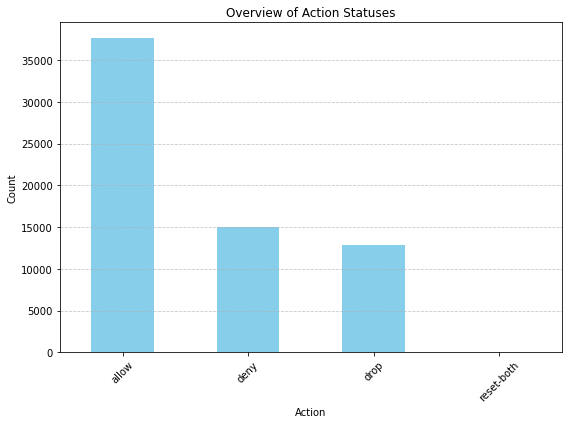

In [7]:
# Group the data by "Action" and count the occurrences of each action
action_counts = df['Action'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
action_counts.plot(kind='bar', color='skyblue')
plt.title('Overview of Action Statuses')
plt.xlabel('Action')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

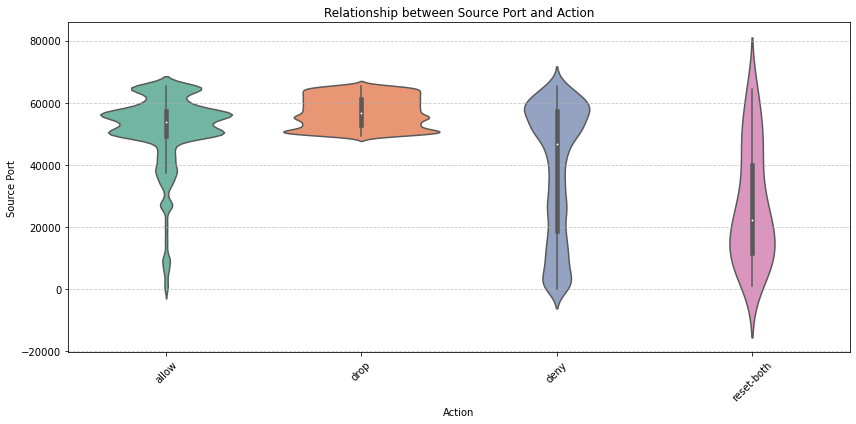

In [8]:
#violin plot to visualize the relationship between "Source Port" and "Action"
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Action', y='Source Port', palette='Set2')
plt.title('Relationship between Source Port and Action')
plt.xlabel('Action')
plt.ylabel('Source Port')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


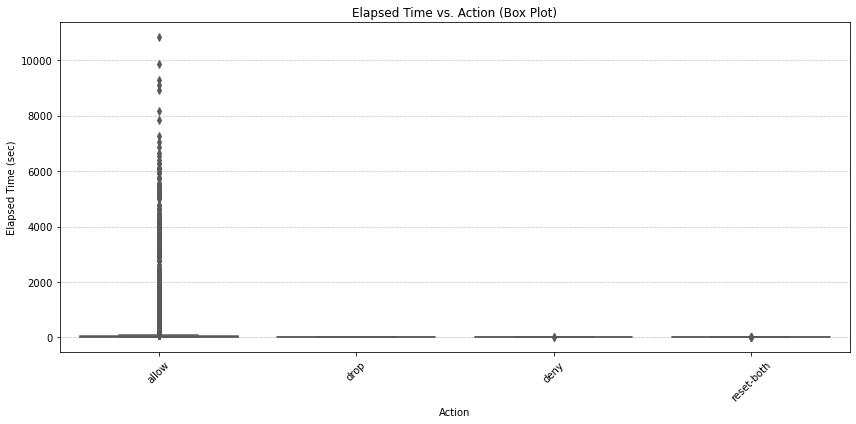

In [9]:
#box plot to visualize the relationship between "Elapsed Time" and "Action"
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Action', y='Elapsed Time (sec)', palette='Set2')
plt.title('Elapsed Time vs. Action (Box Plot)')
plt.xlabel('Action')
plt.ylabel('Elapsed Time (sec)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

df_encoded = pd.get_dummies(df, columns = ['Action']) 
df_encoded.head()

In [10]:
# Define categorical features
categorical = ['Source Port', 'Destination Port', 'NAT Source Port', 'NAT Destination Port']

# Create a list to store data for table visualization
table_data = []

# Define top 10 levels per feature
for f in categorical:
    feature_data = df[f].value_counts().head(10)
    table_data.append([f, '\n'.join(map(str, feature_data.index)), '\n'.join(map(str, feature_data.values))])

# Print table visualization
print(tabulate(table_data, headers=['Feature', 'Top 10 Entries', 'Count'], tablefmt='grid'))


+----------------------+------------------+---------+
| Feature              | Top 10 Entries   | Count   |
+======================+==================+=========+
| Source Port          | 58638            | 840     |
|                      | 27005            | 513     |
|                      | 443              | 273     |
|                      | 57470            | 222     |
|                      | 49418            | 210     |
|                      | 6881             | 177     |
|                      | 0                | 173     |
|                      | 50584            | 116     |
|                      | 3478             | 105     |
|                      | 26900            | 102     |
+----------------------+------------------+---------+
| Destination Port     | 53               | 15414   |
|                      | 445              | 12891   |
|                      | 443              | 11684   |
|                      | 80               | 4035    |
|                      | 251

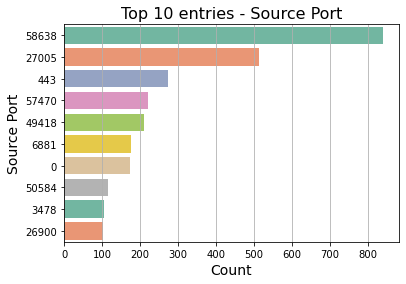

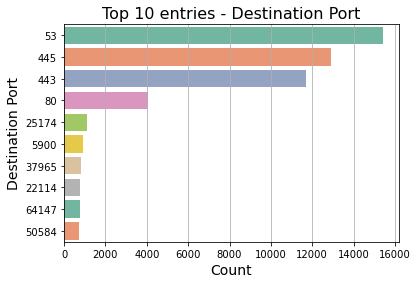

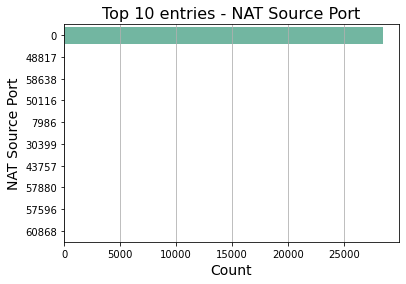

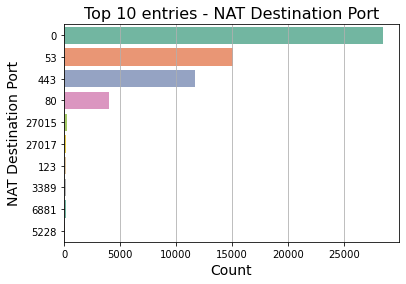

In [11]:
# Define top 10 entries per feature and plot
for f in categorical:
    top_10 = df[f].value_counts().head(10)
    sns.countplot(y=f, data=df, order=top_10.index, palette='Set2')
    plt.title(f'Top 10 entries - {f}', fontsize=16)
    plt.xlabel('Count', fontsize=14)
    plt.ylabel(f, fontsize=14)
    plt.grid(axis='x') 
    plt.show()

In [ ]:
# Scatter plot for Source Port vs Destination Port
plt.figure(figsize=(10, 8))
plt.scatter(df['Source Port'], df['Destination Port'], alpha=0.1, color='black')
plt.xlabel('Source Port', fontsize=14)
plt.ylabel('Destination Port', fontsize=14)
plt.title('Scatter Plot: Source Port vs Destination Port', fontsize=16)
plt.grid(True)
plt.show()

In [13]:
numerical = ['Bytes', 'Bytes Sent', 'Bytes Received',
                'Packets', 'Elapsed Time (sec)', 
                'pkts_sent', 'pkts_received']

Feature: Source Port - Top 10 levels only


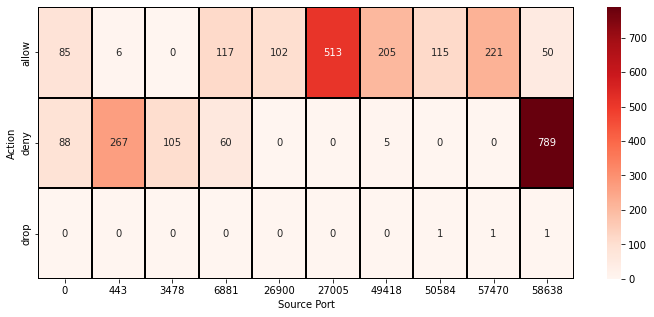

Feature: Destination Port - Top 10 levels only


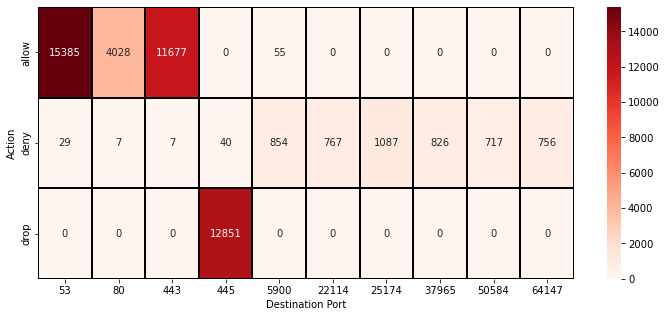

Feature: NAT Source Port - Top 10 levels only


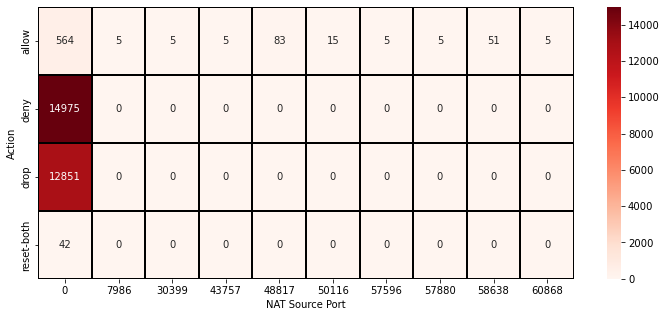

Feature: NAT Destination Port - Top 10 levels only


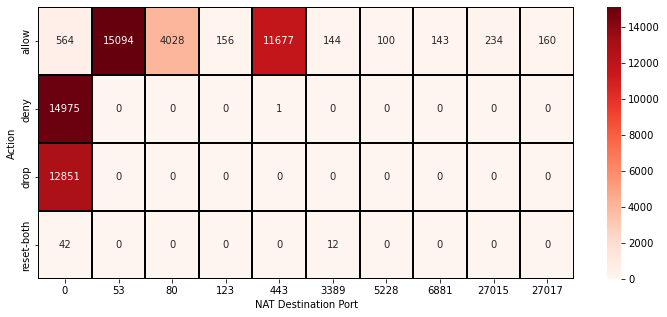

In [23]:
# Visualize crosstable target vs feature (using top 10 levels only)
for f in categorical:
    top10_levels = df[f].value_counts().head(10).index.to_list()  # Corrected to use head(10)
    df_temp = df[df[f].isin(top10_levels)]
    ctab = pd.crosstab(df_temp['Action'], df_temp[f])  # Corrected to use df_temp
    print('Feature:', f, '- Top 10 levels only')
    plt.figure(figsize=(12, 5))
    sns.heatmap(ctab, annot=True, fmt='d',
                cmap='Reds',
                linecolor='black',
                linewidths=0.1)
    plt.show()


*References:*

https://www.kaggle.com/code/gcmadhan/diamond-price-hypothesis-testing-model-98-accur/notebook
